In [1]:
import numpy as np
import pandas as pd
import zipfile
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from skimage import data, exposure
from skimage.transform import rescale, resize

import warnings
warnings.filterwarnings("ignore")

In [2]:
data_set = "dogs-vs-cats"

with zipfile.ZipFile("C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train.zip","r") as z:
    z.extractall(".")

    destination = 'C:\\Users\\HP\\ownloads\\kaggle\\files'
    z.extractall(destination)

In [3]:
data_ = pd.DataFrame({'file': os.listdir('C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train\\train')})
print(data_.head())

           file
0     cat.0.jpg
1     cat.1.jpg
2    cat.10.jpg
3   cat.100.jpg
4  cat.1000.jpg


In [5]:
Y=[]
for i in os.listdir('C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train\\train'):
    if 'dog' in i:
        Y.append(1)
    else:
        Y.append(0)


data_['class'] = Y
print(data_.head())

           file  class
0     cat.0.jpg      0
1     cat.1.jpg      0
2    cat.10.jpg      0
3   cat.100.jpg      0
4  cat.1000.jpg      0


In [6]:
file = data_['file']

Y = data_['class']

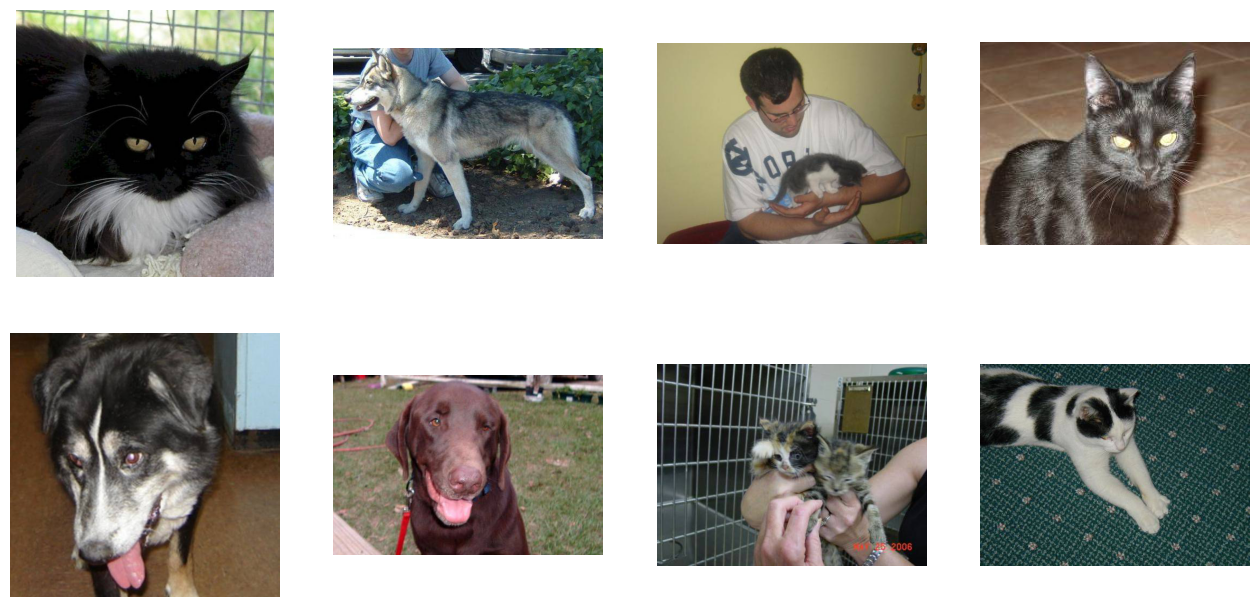

In [27]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(16,16))

images = os.listdir('C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train\\train')
for i in range(8):
    img = random.choice([x for x in images])
    fig = plt.subplot(4,4,i+1)
    fig.axis('off')
    img = mpimg.imread(os.path.join('C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train\\train', img))
    fig.imshow(img)

In [25]:
import os
import matplotlib.image as mpimg
from skimage.transform import resize

image_directory = 'C:\\Users\\HP\\Downloads\\dogs-vs-cats\\train'

files = os.listdir(image_directory)
X = []

for i in files:
    img_path = os.path.join(image_directory, i)
    
    if i.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            
            resized_img = resize(img, (128, 64))  # Resize to 128x64
            X.append(resized_img)
        else:
            print(f"File not found: {img_path}")



In [27]:
import numpy as np
from sklearn.model_selection import train_test_split
X = np.random.rand(100, 5) 
Y = np.random.randint(0, 2, 100)  
data_size = 80  

X = X[:data_size]
Y = Y[:data_size]

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (60, 5), X_test shape: (20, 5)
y_train shape: (60,), y_test shape: (20,)


In [15]:
from sklearn.svm import LinearSVC
c = 1
svm_LinearSVC = LinearSVC(C=c).fit(X_train, y_train)
accuracy = svm_LinearSVC.score(X_test, y_test)
print('SVC Linear Accuracy: ' + str(accuracy))

SVC Linear Accuracy: 0.55


In [14]:
from sklearn.svm import SVC
c = 1 
svm_svc = SVC(kernel='linear', C=c).fit(X_train, y_train)
accuracy = svm_svc.score(X_test, y_test)
print('SVM-SVC Accuracy: ' + str(accuracy))


SVM-SVC Accuracy: 0.55
